# Parte Computacional

In [1]:
#bibliotecas
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

# Função Auxiliar



In [2]:
def calcula_coeficientes(w,wc,n):
  """ Rotina que calcula os coeficientes do polinômio de Chebyshev de maneira não-recursiva 

  Parâmetros: w - vetor de frequências (sugestão: usar um vetor com amostras de 0 a 20 rad/s)
              wc - freq. de corte do filtro (em rad/s)
              n - ordem do filtro de Chebyshev
  Saída:      Tn - vetor com os coeficientes calculados do polinômio de Chebyshev (possui o mesmo tamanho que w)

  """
    
  Tn = np.zeros((w.size,))
  #determina os valores dos coeficientes segundo as expressões padronizadas
  Tn[abs(w) < wc] = np.cos(n*np.arccos(w[abs(w) < wc] / wc))
  Tn[abs(w) >= wc] = np.cosh(n*np.arccosh(w[abs(w) >= wc] / wc))
  return Tn

# **(a)**

In [3]:
def funcHabs(w, wc, e, n):
  '''
  Função que implementa o filtro de Chebyschev
  Input:  w  --> vetor de frequências
          wc --> frequência de corte
          n  --> ordem desejada
          e  --> ganho da frequência de corte
  Output: vetor Habs com o módulo da resposta em frequência do filtro
  '''

  habs = []                                                            #vetor resposta Habs

  Tn = calcula_coeficientes(w, wc, n)                                  #calculamos os coeficientes
  for i in range(len(w)):
    habs.append(1/(math.sqrt(1 + (e**2) * (Tn[i]**2) * (w[i] / wc))))  #construimos o vetor habs

  return habs

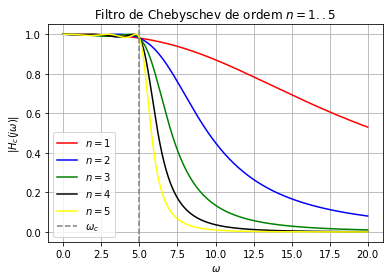

In [4]:
#vamos criar o vetor w de frequências
w = np.arange(0,20, 0.01)

#para n = 1
habs1 = funcHabs(w, 5, 0.2, 1)

#para n = 2
habs2 = funcHabs(w, 5, 0.2, 2)

#para n = 3
habs3 = funcHabs(w, 5, 0.2, 3)

#para n = 4
habs4 = funcHabs(w, 5, 0.2, 4)

#para n = 5
habs5 = funcHabs(w, 5, 0.2, 5)

#plotando o gráfico
plt.title("Filtro de Chebyschev de ordem $n = 1 .. 5$")
plt.xlabel("$\omega$")
plt.ylabel("$|H_c(j\omega)|$")
plt.plot(w, habs1, color = 'r', label = "$n = 1$")
plt.plot(w, habs2, color = 'b', label = "$n = 2$")
plt.plot(w, habs3, color = 'g', label = "$n = 3$")
plt.plot(w, habs4, color = 'black', label = "$n = 4$")
plt.plot(w, habs5, color = 'yellow', label = "$n = 5$")
plt.axvline(x = 5, linestyle = '--', color = 'gray', label = "$\omega_c$")
plt.legend()
plt.grid()
plt.show()

## Discussão letra **(a)**

Podemos observar que, em torno da frequência de corte, quanto maior a ordem do filtro (principalmente quando $n=3$, $n=4$ e $n=5$), a variação do filtro é mais repentina. Isso significa que, quanto maior a ordem, melhor o filtro.

# **(b)**

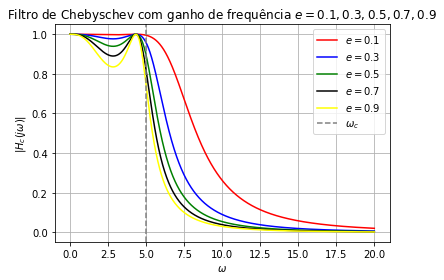

In [5]:
#vamos criar o vetor w de frequências
w = np.arange(0,20, 0.01)

#para n = 3 e e = 0.1
e1 = funcHabs(w, 5, 0.1, 3)

#para n = 3 e e = 0.3
e2 = funcHabs(w, 5, 0.3, 3)

#para n = 3 e e = 0.5
e3 = funcHabs(w, 5, 0.5, 3)

#para n = 3 e e = 0.7
e4 = funcHabs(w, 5, 0.7, 3)

#para n = 3 e e = 0.9
e5 = funcHabs(w, 5, 0.9, 3)

#plotando o gráfico
plt.title("Filtro de Chebyschev com ganho de frequência $e = 0.1, 0.3, 0.5, 0.7, 0.9$")
plt.xlabel("$\omega$")
plt.ylabel("$|H_c(j\omega)|$")
plt.plot(w, e1, color = 'r', label = "$e = 0.1$")
plt.plot(w, e2, color = 'b', label = "$e = 0.3$")
plt.plot(w, e3, color = 'g', label = "$e = 0.5$")
plt.plot(w, e4, color = 'black', label = "$e = 0.7$")
plt.plot(w, e5, color = 'yellow', label = "$e = 0.9$")
plt.axvline(x = 5, linestyle = '--', color = 'gray', label = "$\omega_c$")
plt.legend()
plt.grid()
plt.show()

## Discussão letra **(b)**

Observamos que, conforme aumenta-se o $\epsilon$, a variação é mais repentina. Ou seja, a resposta em frequência tem uma maior oscilação quando $\omega < \omega_c$ e tem um decaimento mais intenso para $\omega > \omega_c$; disso podemos concluir que, para um $\epsilon$ menor o filtro é melhor para a frequência menor que $\omega_c$ e para um $\epsilon$ maior o filtro é melhor para a frequência maior que $\omega_c$.

# **(c)**

In [6]:
def funcButter(w, wc, n):
  '''
  Função que implementa o filtro de Butterworth
  Input:  w  --> vetor de frequências
          wc --> frequência de corte
          n  --> ordem desejada
  Output: vetor Habs com o módulo da resposta em frequência do filtro
  '''

  butter = []                                                 #vetor resposta Habs

  Tn = calcula_coeficientes(w, wc, n)                     #calculamos os coeficientes
  for i in range(len(w)):
    butter.append(1 / (math.sqrt(1 + ((w[i] / wc)**(2*n)))))  #construimos o vetor habs

  return butter

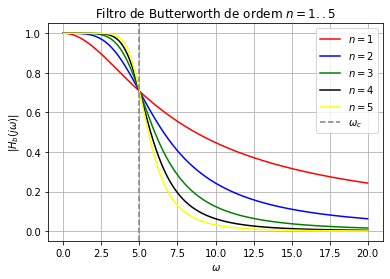

In [7]:
#vamos criar o vetor w de frequências
w = np.arange(0,20, 0.01)

#para n = 1
butter1 = funcButter(w, 5, 1)

#para n = 2
butter2 = funcButter(w, 5, 2)

#para n = 3
butter3 = funcButter(w, 5, 3)

#para n = 4
butter4 = funcButter(w, 5, 4)

#para n = 5
butter5 = funcButter(w, 5, 5)

#plotando o gráfico
plt.title("Filtro de Butterworth de ordem $n = 1 .. 5$")
plt.xlabel("$\omega$")
plt.ylabel("$|H_b(j\omega)|$")
plt.plot(w, butter1, color = 'r', label = "$n = 1$")
plt.plot(w, butter2, color = 'b', label = "$n = 2$")
plt.plot(w, butter3, color = 'g', label = "$n = 3$")
plt.plot(w, butter4, color = 'black', label = "$n = 4$")
plt.plot(w, butter5, color = 'yellow', label = "$n = 5$")
plt.axvline(x = 5, linestyle = '--', color = 'gray', label = "$\omega_c$")
plt.legend()
plt.grid()
plt.show()

## Discussão letra **(c)**

Observamos pelo gráfico que, quanto maior a ordem, mais rapidamente o filtro decai. Disso, podemos concluir que o filtro é melhor para ordens maiores.

# **(d)**

In [8]:
def fourierPlot(w, wc):
  '''
  Função que obtém o valor da Trasformada de Fourier para w = 0 .. 20rad/s
  Inputs: w  --> vetor de frequências
          wc --> frequência de corte
  Output: gráfico da transformada em função de w
  '''

  X_jw = []

  for i in w:
    X_jw.append(np.abs((2/i)*math.sin(math.pi*i/wc)))
  
  plt.title("Gráfico de $|X(j\omega)|$")
  plt.ylabel("$|X(j\omega)|$")
  plt.xlabel("$\omega$")
  plt.plot(w, X_jw, color = 'b', label = "$|X(j\omega)|$")
  plt.axvline(x = wc, linestyle = '--', color = 'gray', label = "$\omega_c$")
  plt.legend()
  plt.grid()
  plt.show()

  return X_jw

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


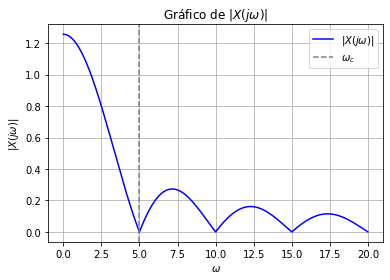

In [9]:
#vamos criar o vetor w de frequências
w = np.arange(0,20, 0.01)

wc = 5

_ = fourierPlot(w, wc)

## Discussão letra **(d)**

A partir do gráfico, observamos que $|X(j\omega)| = 0$ para múltiplos inteiros de $\omega$. Podemos explicar isso através da função seno, pois $sen(\pi*x) = 0$ quando $x\in\mathbb{Z}$, então, como neste caso temos $x = \omega / \omega_c$, $x$ será inteiro quando $\omega$ for um múltiplo inteiro de $\omega_c$.

# **(e)**

In [10]:
def HIdeal(w, wc):
  '''
  Função que implementa o filtro ideal passa-baixa dado no enunciado
  Input: w  --> vetor de frequências
         wc --> frequência de corte
  Output: vetor que representa os valores do filtro ideal passa-baixa
  '''

  H_i = []

  for i in w:
    if np.abs(i) < wc:
      H_i.append(1)
    else:
      H_i.append(0)
  
  plt.title("Gráfico de $|H_{ideal}(j\omega)|$")
  plt.ylabel("$|H_{ideal}(j\omega)|$")
  plt.xlabel("$\omega$")
  plt.plot(w, H_i, color = 'b', label = "$|H_{ideal}(j\omega)|$")
  plt.axvline(x = wc, linestyle = '--', color = 'gray', label = "$\omega_c$")
  plt.legend()
  plt.grid()
  plt.show()
  
  return H_i

In [11]:
def filtragem(H_i, X_jw):
  '''
  Função que filtra o sinal X_jw com H_i
  Input: H_i  --> filtro ideal calculado em HIdeal
         X_jw --> sinal obtido em fourirerPlot
  Output: Y_jw, resultado da friltragem
  '''

  Y_jw = []

  for i in range(len(H_i)):
    Y_jw.append(H_i[i]*X_jw[i])
  
  plt.title("Gráfico de $|Y(j\omega)|$")
  plt.ylabel("$|Y(j\omega)|$")
  plt.xlabel("$\omega$")
  plt.plot(w, Y_jw, color = 'b', label = "$|Y(j\omega)|$")
  plt.axvline(x = wc, linestyle = '--', color = 'gray', label = "$\omega_c$")
  plt.legend()
  plt.grid()
  plt.show()

  return Y_jw

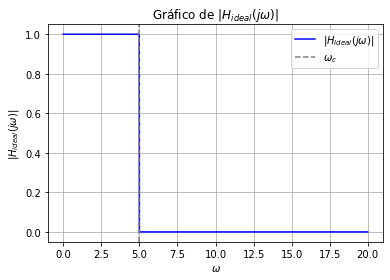

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


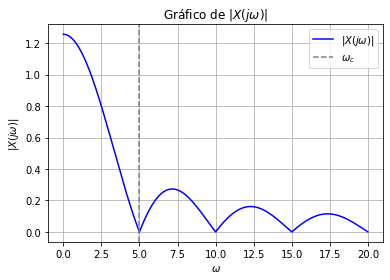

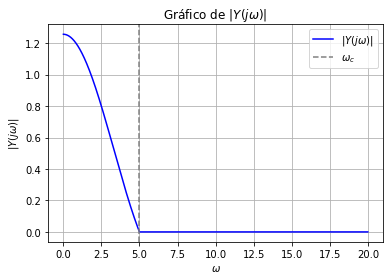

In [12]:
#vamos criar o vetor w de frequências
w = np.arange(0,20, 0.01)

wc = 5

H = HIdeal(w, wc)

X = fourierPlot(w, wc)
print()
Y = filtragem(H, X)

## Discussão letra **(e)**

Como o prórpio enunciado nos diz, $|H_{ideal}(j\omega)|$ é um filtro ideal passa-baixa, ou seja, para frequências  $\omega \leq \omega_c$, o módulo da saída da filtragem é igual a $|X(j\omega)|$ e para frequências  $\omega > \omega_c$, a saída é $0$.

# **(f)**

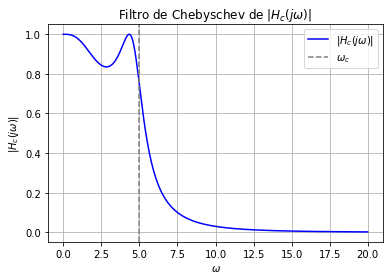

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


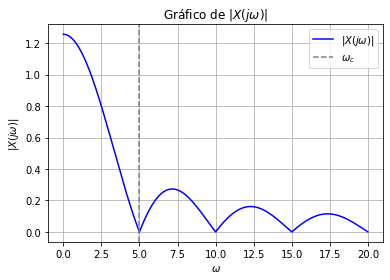

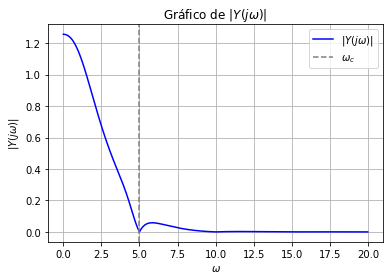

In [13]:
#vamos criar o vetor w de frequências
w = np.arange(0,20, 0.01)

e = 0.9

n = 3

wc = 5

#calculamos o filtro de Chebyschev
H_c = funcHabs(w, wc, e, n)
plt.title("Filtro de Chebyschev de $|H_c(j\omega)|$")
plt.ylabel("$|H_c(j\omega)|$")
plt.xlabel("$\omega$")
plt.plot(w, H_c, color = 'b', label = "$|H_c(j\omega)|$")
plt.axvline(x = wc, linestyle = '--', color = 'gray', label = "$\omega_c$")
plt.legend()
plt.grid()
plt.show()

#filtramos
X = fourierPlot(w, wc)
print()
Y = filtragem(H_c, X)




## Discussão letra **(f)**

Para encontrar o Filtro de Chebyschev para $|H_c(j\omega)|$ usamos a mesma função que calcula o filtro da letra **(a)** e para o módulo de saída $|Y(j\omega)|$ usamos a função de filtragem criada na letra **(e)**.

Através dos gráficos, observamos que, neste caso, há uma leve deformação em $|Y(j\omega)|$ comaprado com o item anterior, isso se deve ao fato de que o filtro não é ideal como na letra **(e)**.

# **(g)**

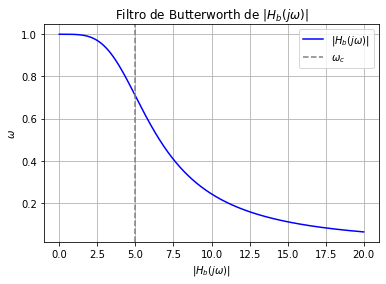

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


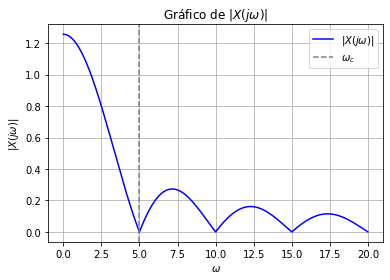

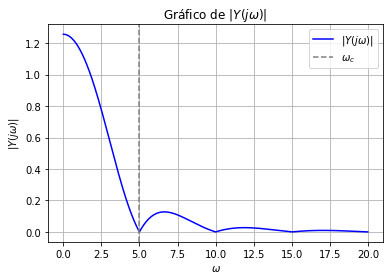

In [14]:
#vamos criar o vetor w de frequências
w = np.arange(0,20, 0.01)

n = 2

wc = 5

#calculamos o filtro de Butterworth
H_b = funcButter(w, wc, n)
plt.title("Filtro de Butterworth de $|H_b(j\omega)|$")
plt.xlabel("$|H_b(j\omega)|$")
plt.ylabel("$\omega$")
plt.plot(w, H_b, color = 'b', label = "$|H_b(j\omega)|$")
plt.axvline(x = wc, linestyle = '--', color = 'gray', label = "$\omega_c$")
plt.legend()
plt.grid()
plt.show()

#filtramos
X = fourierPlot(w, wc)
print()
Y = filtragem(H_b, X)

## Discussão letra **(g)**

Para encontrar o Filtro de Butterworth para $|H_b(j\omega)|$ usamos a mesma função que calcula o filtro da letra **(c)** e para o módulo de saída $|Y(j\omega)|$ usamos a função de filtragem criada na letra **(e)**.

Assim como na letra **(g)**, há uma deformação em $|Y(j\omega)|$ comaprado com a letra **(e)**, isso se deve ao fato de que o filtro não é ideal como na letra em comparação.

# **(h)**

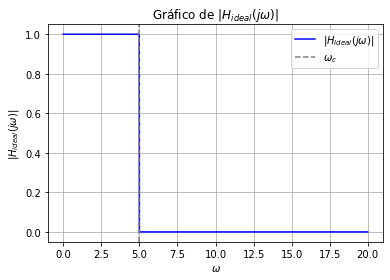

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


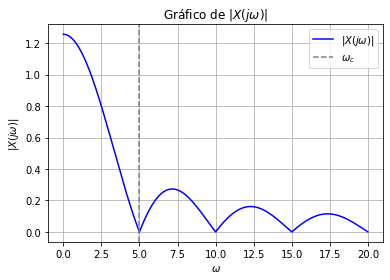

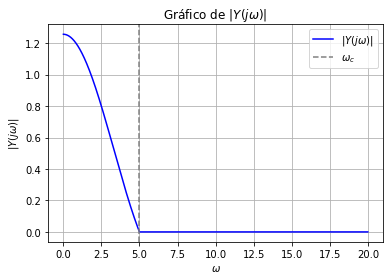

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


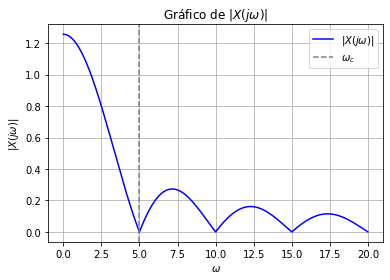

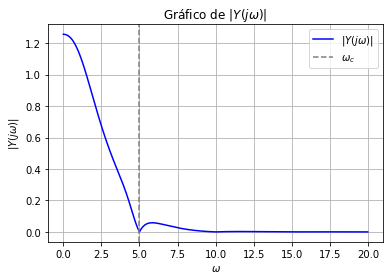

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


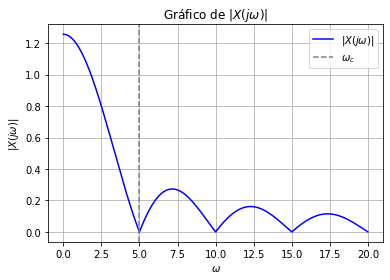

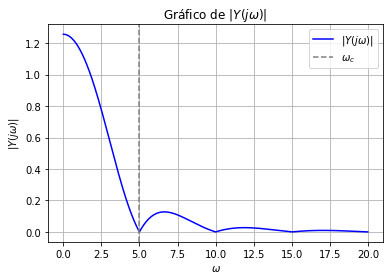




#################################################
RESPOSTA FINAL LETRA H





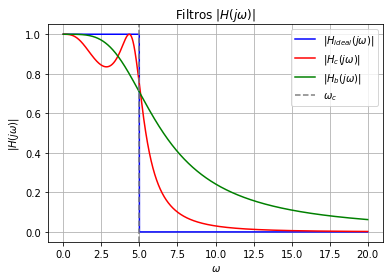

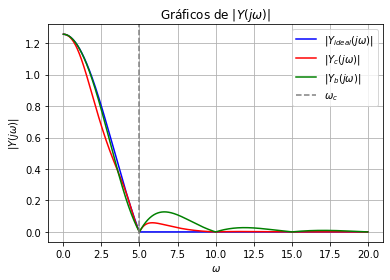

In [15]:
####################################LETRA E####################################
w = np.arange(0,20, 0.01)                                                     #
                                                                              #
wc = 5                                                                        #
                                                                              #
H_e = HIdeal(w, wc)                                                           #
                                                                              #
X = fourierPlot(w, wc)                                                        #
                                                                              #
Y_e = filtragem(H, X)                                                         #
###############################################################################


####################################LETRA F####################################
w = np.arange(0,20, 0.01)                                                     #
                                                                              #
e = 0.9                                                                       #
                                                                              #
n = 3                                                                         #
                                                                              #
wc = 5                                                                        #
                                                                              #
#calculamos o filtro de Chebyschev                                            #
H_c = funcHabs(w, wc, e, n)                                                   #
                                                                              #
#filtramos                                                                    #
X = fourierPlot(w, wc)                                                        #
print()                                                                       #
Y_f = filtragem(H_c, X)                                                       #
###############################################################################


####################################LETRA G####################################
w = np.arange(0,20, 0.01)                                                     #
                                                                              #
n = 2                                                                         #
                                                                              #
wc = 5                                                                        #
                                                                              #
                                                                              #
#calculamos o filtro de Butterworth                                           #
H_b = funcButter(w, wc, n)                                                    #
                                                                              #
#filtramos                                                                    #
X = fourierPlot(w, wc)                                                        #
print()                                                                       #
Y_g = filtragem(H_b, X)                                                       #
###############################################################################


####################################GRÁFICO####################################
print()                                                                       #
print()                                                                       #
print()                                                                       #
print("#################################################")                    #
print("RESPOSTA FINAL LETRA H")                                               #
print()                                                                       #
print()                                                                       #
print()                                                                       #
plt.title("Filtros $|H(j\omega)|$")                                           #
plt.ylabel("$|H(j\omega)|$")                                                  #
plt.xlabel("$\omega$")                                                        #
plt.plot(w, H_e, color = 'b', label = "$|H_{ideal}(j\omega)|$")               #
plt.plot(w, H_c, color = 'r', label = "$|H_c(j\omega)|$")                     #
plt.plot(w, H_b, color = 'g', label = "$|H_b(j\omega)|$")                     #
plt.axvline(x = wc, linestyle = '--', color = 'gray', label = "$\omega_c$")   #
plt.legend()                                                                  #
plt.grid()                                                                    #
plt.show()                                                                    #
                                                                              #
print()                                                                       # 
                                                                              #
plt.title("Gráficos de $|Y(j\omega)|$")                                       #
plt.ylabel("$|Y(j\omega)|$")                                                  #
plt.xlabel("$\omega$")                                                        #
plt.plot(w, Y_e, color = 'b', label = "$|Y_{ideal}(j\omega)|$")                     #
plt.plot(w, Y_f, color = 'r', label = "$|Y_c(j\omega)|$")                     #
plt.plot(w, Y_g, color = 'g', label = "$|Y_b(j\omega)|$")                     #
plt.axvline(x = wc, linestyle = '--', color = 'gray', label = "$\omega_c$")   #
plt.legend()                                                                  #
plt.grid()                                                                    #
plt.show()                                                                    #
###############################################################################

## Discussão letra **(h)**

Para os gráficos referentes aos filtros $|H_{ideal}(j\omega)|$, $|H_c(j\omega)|$ e $|H_b(j\omega)|$ observamos que somente o ideal $|H_{ideal}(j\omega)|$ decai completamente na frequência de corte $\omega_c = 5$, enquanto que $|H_c(j\omega)|$ e $|H_b(j\omega)|$ possuem distorções porque não são ideais. 

Para valores de $\omega \leq \omega_c = 5$, a resposta em frequência de $|H_c(j\omega)|$ apresenta duas oscilações e, para valores de $\omega > \omega_c = 5$, a queda ocorre muito rapidamente, sendo que seu valor vai para zero em um $\omega \simeq 3*\omega_c$. Já para a resposta em frequência de $|H_b(j\omega)|$, o decaimento é mais lento para valores $\omega > \omega_c = 5$, e seu valor vai para zero em um $\omega \simeq 4*\omega_c$.

Esta mesma análise inicial pode ser utilizada em $|Y_{ideal}(j\omega)|$, $|Y_c(j\omega)|$ e $|Y_b(j\omega)|$. Novamente aqui, observamos que somente o ideal $|Y_{ideal}(j\omega)|$ decai completamente na frequência de corte $\omega_c = 5$, enquanto que $|Y_c(j\omega)|$ e $|Y_b(j\omega)|$ possuem distorções porque não são ideais.

Para frequências $\omega \leq \omega_c = 5$, temos que $|Y_{ideal}(j\omega)| = |X(j\omega)|$ e $|Y_{ideal}(j\omega)| = 0$ para $\omega > \omega_c = 5$. Para $|Y_c(j\omega)|$, notamos que é ligeiramente menor que $|Y_{ideal}(j\omega)|$ e atinge o valor zero quando $\omega \simeq 2*\omega_c$. Já para $|Y_b(j\omega)|$, temos uma similaridade muito grande com $|Y_{ideal}(j\omega)|$ para $\omega \leq \omega_c = 5$, mas para $\omega > \omega_c = 5$ temos mais oscilações se comparado aos outros e chega-se em zero quando $\omega \simeq 4*\omega_c$.